In [230]:
from keras.models import Sequential
from keras.layers import LSTM, Conv2D
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from keras.layers import Dense
from keras.datasets import imdb

from matplotlib import pyplot as plt
%matplotlib inline

import numpy

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12037750176328024897
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 215885414
locality {
  bus_id: 1
}
incarnation: 6307635448333367168
physical_device_desc: "device: 0, name: GeForce GTX TITAN X, pci bus id: 0000:01:00.0"
]


In [75]:
len(Y_train)

60

In [244]:
left_stay_train = numpy.load('train/leftStay.npy')
left_stay2_train = numpy.load('train/leftStay2.npy')
right_stay_train = numpy.load('train/rightStay.npy')
right_stay2_train = numpy.load('train/rightStay2.npy')
matt_right_stay_train = numpy.load('train/mattRightStay.npy')
left_back_train = numpy.load('train/leftBack.npy')
right_back_train = numpy.load('train/rightBack.npy')
n_samples = len(right_back_train)

Y_train = []
for i in range(n_samples):
    Y_train.append([1, 0, 0, 0])
for i in range(n_samples):
    Y_train.append([0, 1, 0, 0])
for i in range(100):
    Y_train.append([0, 1, 0, 0])
for i in range(n_samples):
    Y_train.append([0, 0, 1, 0])
for i in range(n_samples):
    Y_train.append([0, 0, 0, 1])
for i in range(100):
    Y_train.append([0, 0, 0, 1])

X_train = numpy.concatenate((left_back_train, left_stay_train, left_stay2_train, right_back_train, right_stay_train, right_stay2_train))#, matt_right_stay_train))

In [240]:
left_stay_test = numpy.load('test/testLeftStay.npy')
right_stay_test = numpy.load('test/testRightStay.npy')
left_back_test = numpy.load('test/testLeftBack.npy')
right_back_test = numpy.load('test/testRightBack.npy')
n_samples = len(right_back_test)

Y_test = []
for i in range(n_samples):
    Y_test.append([1, 0, 0, 0])
for i in range(n_samples):
    Y_test.append([0, 1, 0, 0])
for i in range(n_samples):
    Y_test.append([0, 0, 1, 0])
for i in range(n_samples):
    Y_test.append([0, 0, 0, 1])

X_test = numpy.concatenate((left_back_test, left_stay_test, right_back_test, right_stay_test))

In [247]:
# create the model
model = Sequential()
model.add(Convolution2D(32, 5, 5, border_mode='same', input_shape=(200, 6)))
model.add(MaxPooling2D(pool_size=(10, 10)))
model.add(Activation('relu'))
model.add(Permute(0, 3, 2, 1))
model.add(LSTM(48, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(4, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=20, shuffle=True)
# Final evaluation of the model
scores = model.evaluate(X_train, Y_train, verbose=0)
print("Overfit Accuracy: %.2f%%" % (scores[1]*100))
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_186 (LSTM)              (None, 48)                10560     
_________________________________________________________________
dense_181 (Dense)            (None, 4)                 196       
Total params: 10,756
Trainable params: 10,756
Non-trainable params: 0
_________________________________________________________________
None
Train on 260 samples, validate on 60 samples
Epoch 1/5
260/260 [==============================] - 14s - loss: 1.3352 - acc: 0.4000 - val_loss: 1.4116 - val_acc: 0.2500
Epoch 2/5
260/260 [==============================] - 3s - loss: 1.1812 - acc: 0.4423 - val_loss: 1.6422 - val_acc: 0.2500
Epoch 3/5
260/260 [==============================] - 3s - loss: 1.0610 - acc: 0.4423 - val_loss: 1.8797 - val_acc: 0.2500
Epoch 4/5
260/260 [==============================] - 3s - loss: 1.0557 - acc: 0.4423 - val_loss: 1.8810 - val_acc: 0.

In [163]:
# Final evaluation of the model
scores = model.evaluate(X_train, Y_train, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 75.00%


In [217]:
len(Y_train)

160

In [221]:
# create the model
model2 = Sequential()
model2.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, input_shape=(200, 6)))
model2.add(Dense(4, activation='sigmoid'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

acc = 0.0
n_try = 0
model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300, batch_size=20, shuffle=True)
# Final evaluation of the model
scores = model2.evaluate(X_train, Y_train, verbose=0)
print("Overfit Accuracy: %.2f%%" % (scores[1]*100))
scores = model2.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

acc = scores[1]
n_try += 1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_169 (LSTM)              (None, 100)               42800     
_________________________________________________________________
dense_164 (Dense)            (None, 4)                 404       
Total params: 43,204
Trainable params: 43,204
Non-trainable params: 0
_________________________________________________________________
None
Train on 160 samples, validate on 60 samples
Epoch 1/300
160/160 [==============================] - 12s - loss: 1.3375 - acc: 0.5187 - val_loss: 1.3988 - val_acc: 0.2500
Epoch 2/300
160/160 [==============================] - 2s - loss: 1.1134 - acc: 0.7188 - val_loss: 1.6706 - val_acc: 0.2500
Epoch 3/300
160/160 [==============================] - 2s - loss: 0.9310 - acc: 0.7188 - val_loss: 2.0178 - val_acc: 0.2500
Epoch 4/300
160/160 [==============================] - 2s - loss: 0.9130 - acc: 0.7188 - val_loss: 1.9486 - val

160/160 [==============================] - 2s - loss: 0.8608 - acc: 0.7188 - val_loss: 1.7803 - val_acc: 0.2500
Epoch 127/300
160/160 [==============================] - 2s - loss: 0.8916 - acc: 0.7188 - val_loss: 2.0868 - val_acc: 0.2500
Epoch 128/300
160/160 [==============================] - 2s - loss: 0.8889 - acc: 0.7188 - val_loss: 2.0363 - val_acc: 0.2500
Epoch 129/300
160/160 [==============================] - 2s - loss: 0.9050 - acc: 0.7188 - val_loss: 1.7823 - val_acc: 0.2500
Epoch 130/300
160/160 [==============================] - 2s - loss: 0.8695 - acc: 0.7188 - val_loss: 1.8516 - val_acc: 0.2500
Epoch 131/300
160/160 [==============================] - 2s - loss: 0.8537 - acc: 0.7188 - val_loss: 1.9510 - val_acc: 0.2500
Epoch 132/300
160/160 [==============================] - 2s - loss: 0.8655 - acc: 0.7188 - val_loss: 2.0954 - val_acc: 0.2500
Epoch 133/300
160/160 [==============================] - 2s - loss: 0.8646 - acc: 0.7188 - val_loss: 1.9062 - val_acc: 0.2500
Epoch 

160/160 [==============================] - 2s - loss: 0.8752 - acc: 0.7188 - val_loss: 1.8454 - val_acc: 0.2500
Epoch 257/300
160/160 [==============================] - 2s - loss: 0.8652 - acc: 0.7188 - val_loss: 1.8722 - val_acc: 0.2500
Epoch 258/300
160/160 [==============================] - 2s - loss: 0.8604 - acc: 0.7188 - val_loss: 1.8775 - val_acc: 0.2500
Epoch 259/300
160/160 [==============================] - 2s - loss: 0.8584 - acc: 0.7188 - val_loss: 1.8800 - val_acc: 0.2500
Epoch 260/300
160/160 [==============================] - 2s - loss: 0.8397 - acc: 0.7188 - val_loss: 1.9568 - val_acc: 0.2500
Epoch 261/300
160/160 [==============================] - 2s - loss: 0.8428 - acc: 0.7188 - val_loss: 1.8075 - val_acc: 0.2500
Epoch 262/300
160/160 [==============================] - 2s - loss: 0.8770 - acc: 0.7188 - val_loss: 1.9963 - val_acc: 0.2500
Epoch 263/300
160/160 [==============================] - 2s - loss: 0.8320 - acc: 0.7188 - val_loss: 2.0501 - val_acc: 0.2500
Epoch 

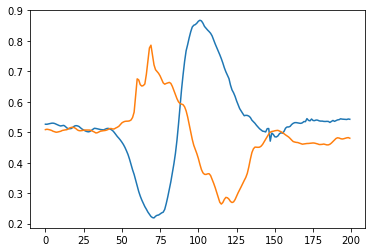

In [200]:
plt.plot(right_stay_test[0].T[0])
plt.plot(left_stay_test[0].T[0])

In [187]:
left_back_test[0].T[0]

array([  4.83779660e-01,   4.84817273e-01,   4.86633097e-01,
         4.88708324e-01,   4.92233158e-01,   4.93789578e-01,
         4.93102922e-01,   4.91714351e-01,   4.87014572e-01,
         4.81429770e-01,   4.78683146e-01,   4.78881514e-01,
         4.82055390e-01,   4.84756237e-01,   4.86007477e-01,
         4.85595483e-01,   4.85656519e-01,   4.86266880e-01,
         4.85931182e-01,   4.86984054e-01,   4.88998245e-01,
         4.91134508e-01,   4.92080568e-01,   4.90417334e-01,
         4.87685969e-01,   4.85076677e-01,   4.85122454e-01,
         4.87579156e-01,   4.89410239e-01,   4.89913787e-01,
         4.89669642e-01,   4.88418402e-01,   4.85961700e-01,
         4.80346380e-01,   4.76958877e-01,   4.77401389e-01,
         4.81521324e-01,   4.86953536e-01,   4.91042954e-01,
         4.91073472e-01,   4.88830396e-01,   4.87045090e-01,
         4.86358434e-01,   4.85809110e-01,   4.85458152e-01,
         4.87045090e-01,   4.88281071e-01,   4.88494697e-01,
         4.85778592e-01,